In [1]:
import gymnasium as gym
import pygame
import numpy as np
import pandas as pd
import agents
import torch
import simulation
from simulation import NSteprunEpisodeSarsa
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

Using cuda device


In [10]:
hidden_dim = 20
alpha = 0.0001
gamma = 0.95
epsilon = 0.01
n = 20
n_episodes = 10000

In [11]:
# env = gym.make("LunarLander-v2", render_mode='human')
env = gym.make("LunarLander-v2", render_mode='rgb_array')


agent_sarsa = agents.AgentSARSA(
                            state_dim=env.observation_space.shape[0],
                            action_dim=env.action_space.n,
                            hidden_dim=hidden_dim,
                            alpha=alpha,
                            gamma=gamma, 
                            epsilon=epsilon, 
                            n=n)

runs = []
i_epi = 0
while(i_epi < n_episodes):
    G = NSteprunEpisodeSarsa(env, agent=agent_sarsa, n=n, gamma=gamma)
    print(f"i_epi = {i_epi}, G = {G}")
    runs.append(G)
    i_epi+=1

Linear(in_features=8, out_features=20, bias=True)
Linear(in_features=20, out_features=4, bias=True)
i_epi = 0, G = -115.4066989867664
i_epi = 1, G = -163.5533102548824
i_epi = 2, G = -110.16191874002504
i_epi = 3, G = -140.73039155261966
i_epi = 4, G = -169.76453773668334
i_epi = 5, G = -312.24623768977415
i_epi = 6, G = -311.9914358745572
i_epi = 7, G = -208.1110385472271
i_epi = 8, G = -734.5624102834028
i_epi = 9, G = -392.7346931231148
i_epi = 10, G = -151.85298715124685
i_epi = 11, G = -147.54535712902347
i_epi = 12, G = -184.2189135155188
i_epi = 13, G = -123.06944082012392
i_epi = 14, G = -148.6122943476434
i_epi = 15, G = -194.10675090908583
i_epi = 16, G = -289.59911076717106
i_epi = 17, G = -127.26665370677858
i_epi = 18, G = -73.9395361240182
i_epi = 19, G = -273.06282409368214
i_epi = 20, G = -214.94622167303143
i_epi = 21, G = -119.79784037780689
i_epi = 22, G = -250.06613225522892
i_epi = 23, G = -130.72002574228964
i_epi = 24, G = -155.17505706152778
i_epi = 25, G = -502

In [12]:
runs_df = pd.DataFrame(runs, columns=['total_reward'])

In [24]:
runs_df['100 episode moving average'] = runs_df['total_reward'].rolling(100).mean()

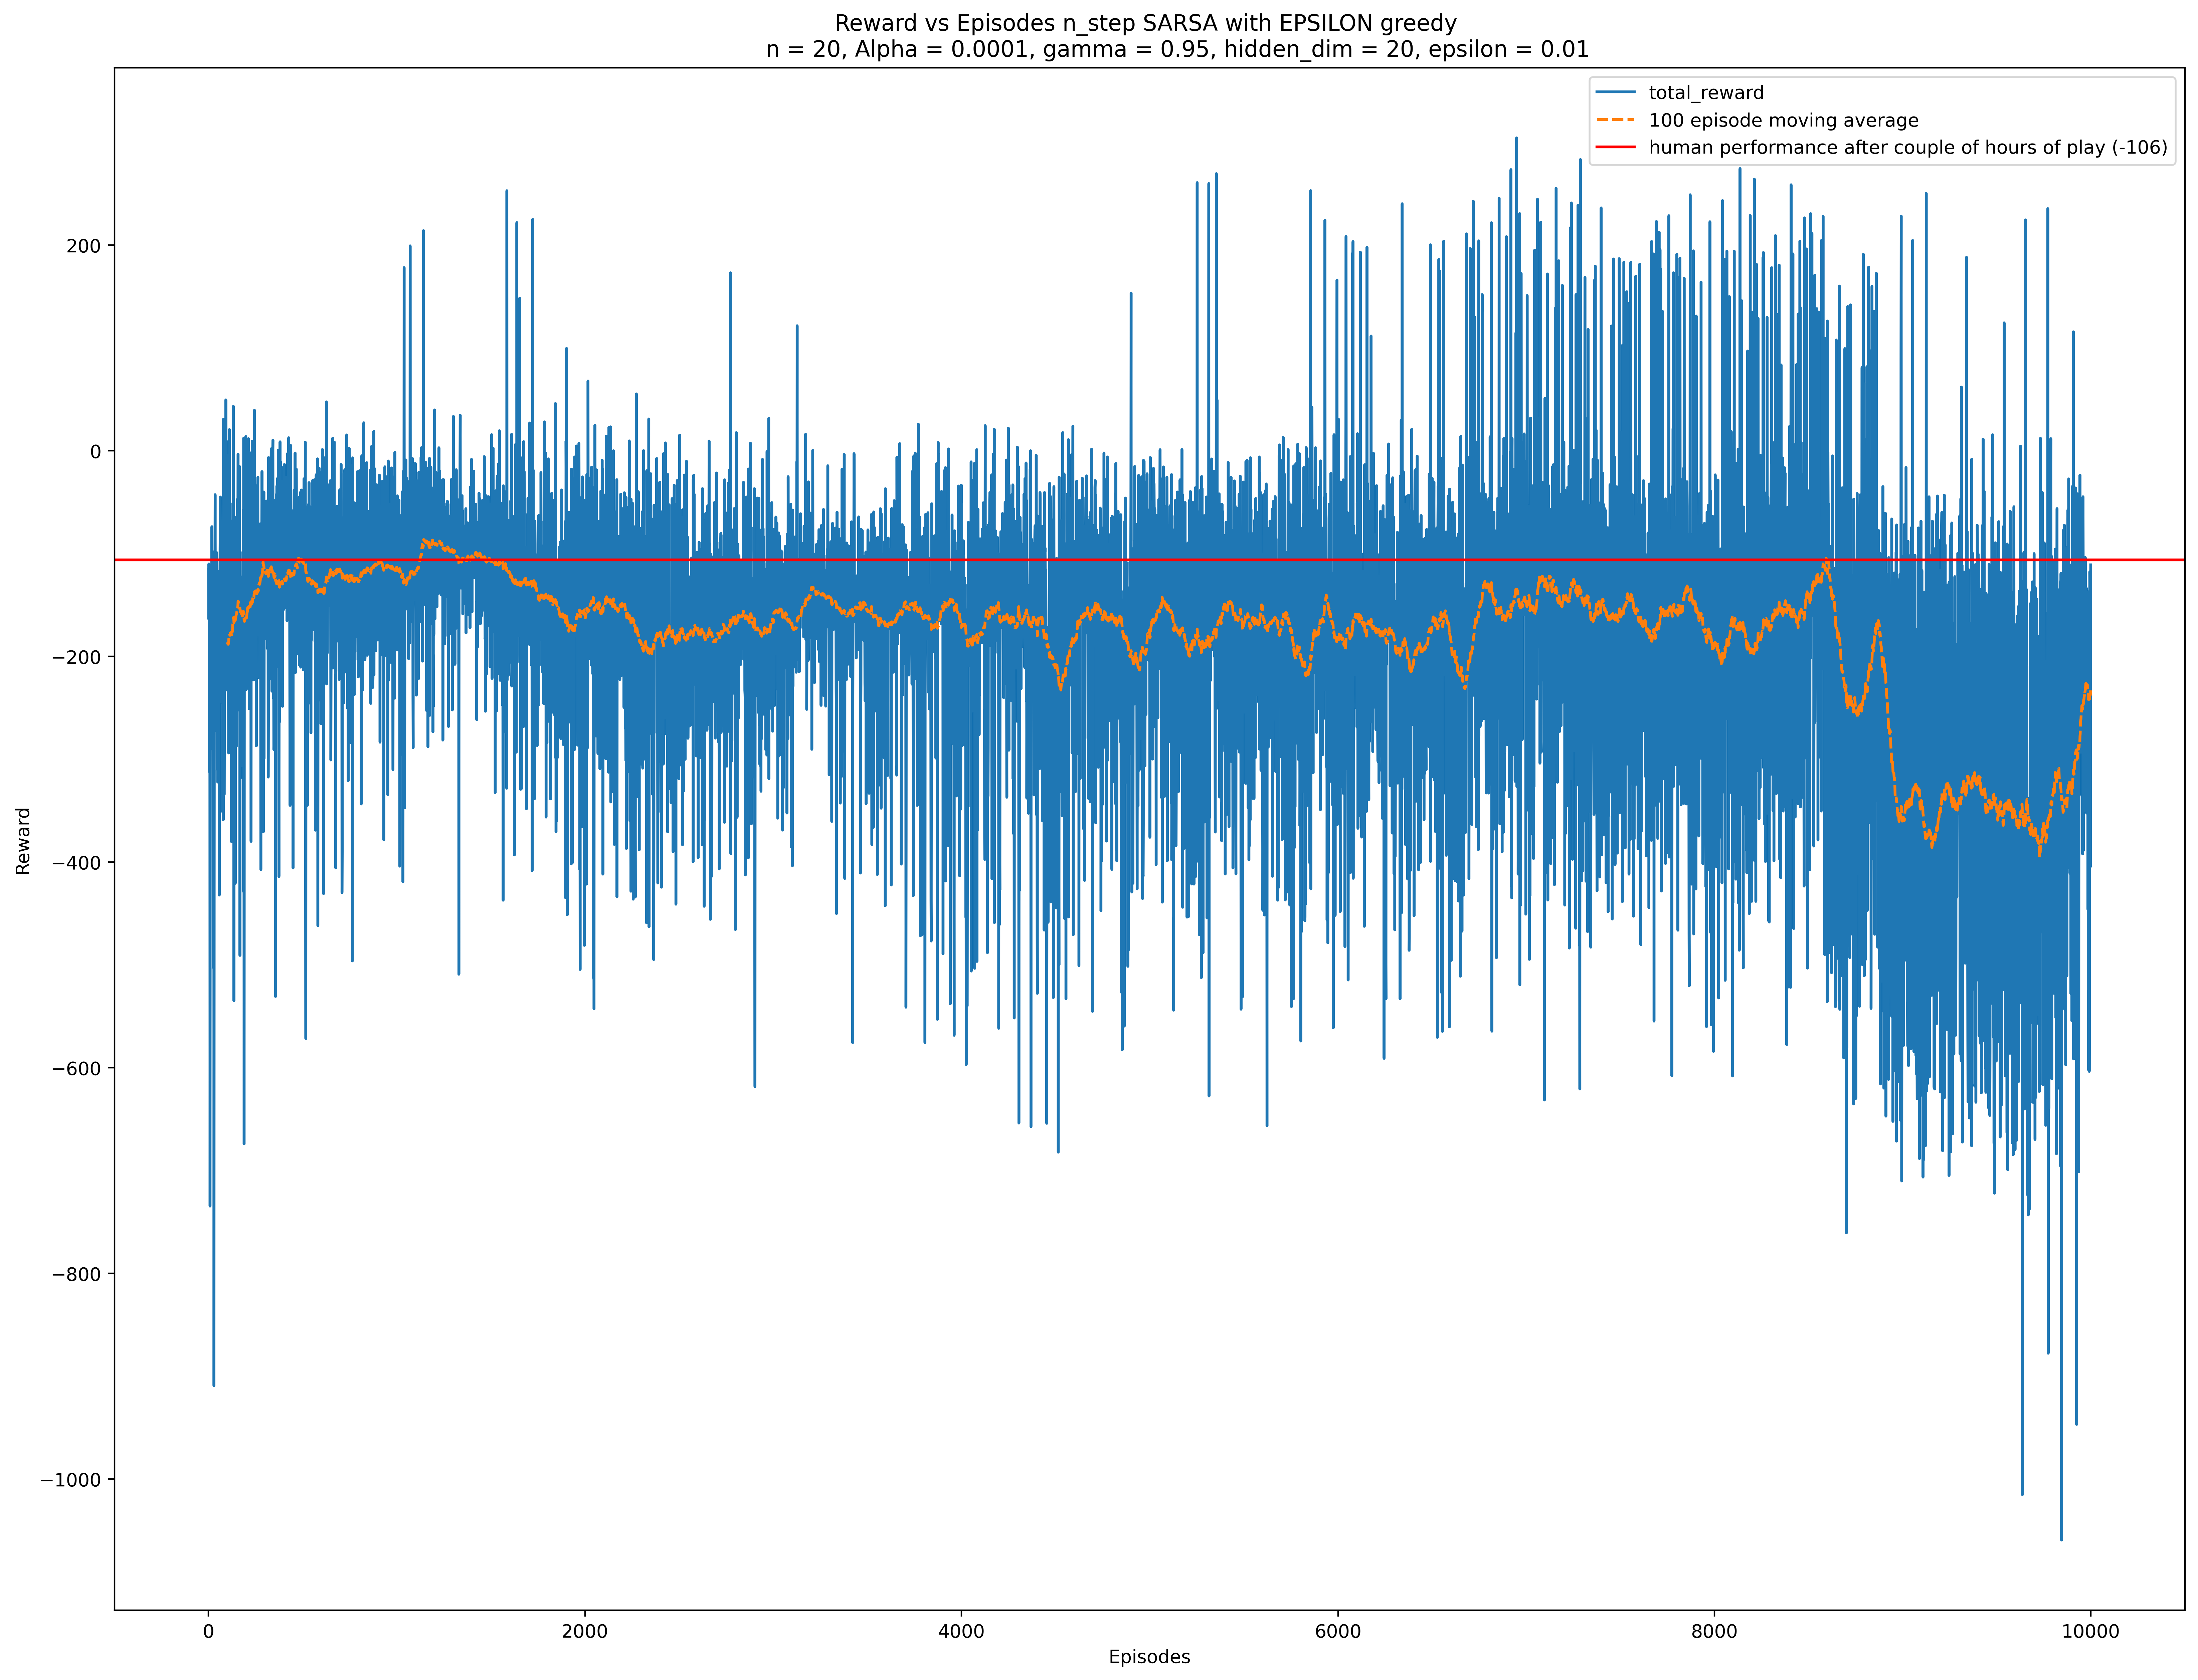

In [46]:
from matplotlib.pyplot import figure

figure(figsize=(20, 15), dpi=400)
sns.lineplot(runs_df, err_style="band", errorbar=("sd", 1), )

plt.axhline(y=-106.2760836, color='r', linestyle='-', label='human performance after couple of hours of play (-106)')

# plt.axhline(y=-106.2760836, color='r', linestyle='-', label='human performance after couple of hours of play (-106)')

plt.ylabel(f"Reward")
plt.xlabel(f"Episodes")

title = f"Reward vs Episodes n_step SARSA with EPSILON greedy \n\
        n = {n}, Alpha = {alpha}, gamma = {gamma}, hidden_dim = {hidden_dim}, epsilon = {epsilon}"
plt.title(title)
plt.legend()
plt.savefig(f"plots/Moving average n_step SARSA with EPSILON greedy n_epi:{n_episodes} n:{n} Alpha:{alpha} gamma:{gamma} hidden_dim:{hidden_dim} epsilon:{epsilon}.jpg", bbox_inches='tight')
plt.show()

In [47]:
runs_df_best = runs_df
runs_df_best

,total_reward,100 episode moving average
0,-115.406699,NaN
1,-163.553310,NaN
2,-110.161919,NaN
3,-140.730392,NaN
4,-169.764538,NaN
...,...,...
9995,-146.529167,-237.228227
9996,-261.278700,-237.981902
9997,-404.530717,-237.097083
9998,-218.804605,-234.693710


In [31]:
agent_sarsa.qnet

Q_Network(
  (x_layer): Linear(in_features=8, out_features=20, bias=True)
  (h_layer): Linear(in_features=20, out_features=20, bias=True)
  (y_layer): Linear(in_features=20, out_features=4, bias=True)
)

In [32]:
agent_sarsa.qnet.state_dict()

OrderedDict([('x_layer.weight',
              tensor([[-6.7382e-02,  5.4517e-01, -1.7518e-01, -7.0201e-01,  1.7376e+00,
                       -5.6942e-02,  1.6758e-01,  1.0833e-01],
                      [ 3.2824e-01,  5.3588e-01,  1.4870e-01,  1.5618e+00,  4.5662e-01,
                       -9.8427e-02,  3.8416e-01,  6.9316e-03],
                      [ 2.3512e-01, -8.7116e-01,  1.6219e-01, -8.5399e-01, -1.8897e-01,
                        1.6350e-01,  1.9196e-01,  6.0977e-02],
                      [-3.5895e-01,  1.2974e-01,  2.8345e-01,  7.0358e-01, -1.2042e+00,
                       -2.5442e-01, -7.4658e-01,  9.1757e-03],
                      [-3.1067e-01, -1.7276e-03,  6.6484e-01, -7.0245e-02,  2.0135e+00,
                       -7.8306e-01,  1.1735e-01, -1.7118e-01],
                      [ 2.3236e-01,  4.1560e-01,  7.6489e-02, -3.6553e-01, -7.6194e-01,
                       -7.3368e-02, -3.7764e-02, -1.6774e-02],
                      [-1.9620e-01, -1.5419e-01,  3.8460e-01, 

In [35]:
torch.save(agent_sarsa, "10k steps sarsa full model")
torch.save(agent_sarsa.qnet.state_dict(), "10k steps sarsa qnet state dict")

In [12]:
run_stat = {
    "hidden_dim": hidden_dim,
    "n": n,
    "alpha": alpha,
    "gamma": gamma,
    "epsilon": epsilon,
    "n": n,
    "n_episodes": n_episodes,
    "runs_df": runs_df
}

In [13]:
run_stat

{'hidden_dim': 256,
 'n': 20,
 'alpha': 0.01,
 'gamma': 0.99,
 'epsilon': 0.15,
 'n_episodes': 1250,
 'runs_df':       total_reward
 0      -588.317448
 1      -102.628797
 2      -394.513619
 3      -451.570883
 4      -505.038309
 ...            ...
 1245   -763.756784
 1246   -502.968946
 1247   -475.147510
 1248   -855.652857
 1249   -550.419804
 
 [1250 rows x 1 columns]}

20 0.0001 0.95 0.01 5
Linear(in_features=8, out_features=20, bias=True)
Linear(in_features=20, out_features=4, bias=True)
i_epi = 0, G = -1061.7008881612414
i_epi = 100, G = -201.23713064200456
i_epi = 200, G = -55.51247608327008
i_epi = 300, G = -111.13511166370314
i_epi = 400, G = -201.62673855947233
i_epi = 500, G = -256.6923396390469
i_epi = 600, G = -396.0464584675028
i_epi = 700, G = -312.3211573081346
i_epi = 800, G = -332.9925314779133
i_epi = 900, G = -111.75599861240627


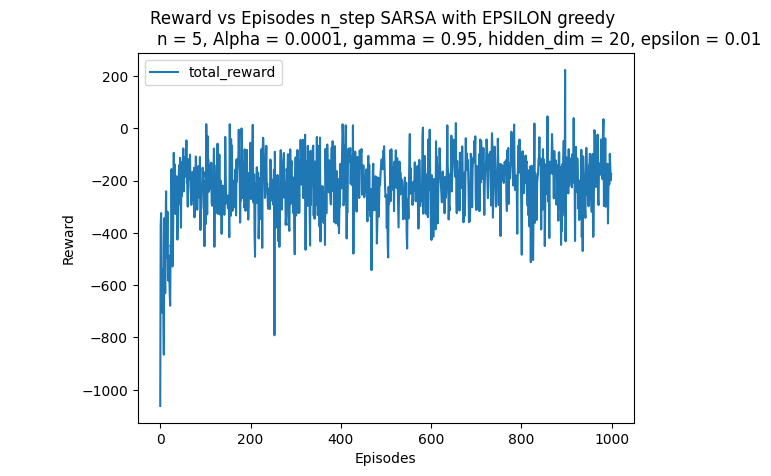

20 0.0001 0.95 0.01 10
Linear(in_features=8, out_features=20, bias=True)
Linear(in_features=20, out_features=4, bias=True)
i_epi = 0, G = -444.45206429486956
i_epi = 100, G = 236.99524315888954
i_epi = 200, G = -10.332059457924998
i_epi = 300, G = -22.532646065828118
i_epi = 400, G = -135.63283553352994
i_epi = 500, G = -151.9445822732768
i_epi = 600, G = -126.64352469051765
i_epi = 700, G = -187.55285886273464
i_epi = 800, G = -120.53300541866072
i_epi = 900, G = -217.28023503801614


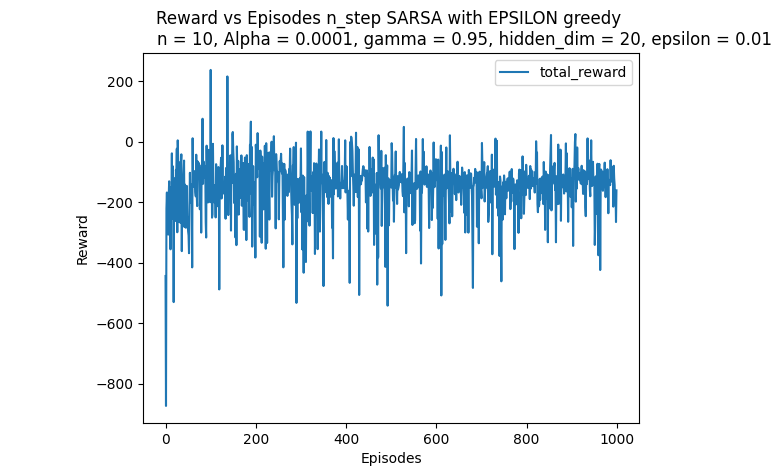

20 0.0001 0.95 0.01 20
Linear(in_features=8, out_features=20, bias=True)
Linear(in_features=20, out_features=4, bias=True)
i_epi = 0, G = -598.069760311523
i_epi = 100, G = -124.26389844704197
i_epi = 200, G = 42.6628433323105
i_epi = 300, G = -167.00143974853574
i_epi = 400, G = -148.62769869651106
i_epi = 500, G = -170.71345684764233
i_epi = 600, G = -204.9676847312033
i_epi = 700, G = -413.06539307961424
i_epi = 800, G = 35.57906113394711
i_epi = 900, G = -68.63146211522438


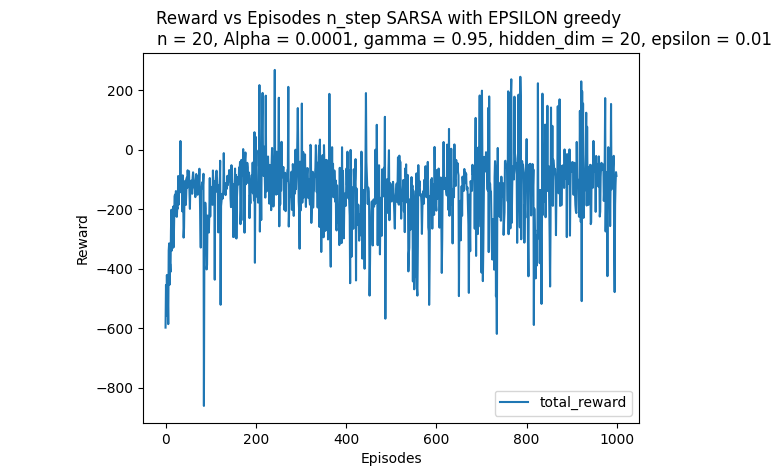

20 0.0001 0.95 0.01 50
Linear(in_features=8, out_features=20, bias=True)
Linear(in_features=20, out_features=4, bias=True)
i_epi = 0, G = -212.89689933448818
i_epi = 100, G = -23.852031004978173
i_epi = 200, G = -138.46335137008487
i_epi = 300, G = -78.47223914583579
i_epi = 400, G = -102.01241096592253
i_epi = 500, G = -112.47521582323925
i_epi = 600, G = -83.9553103888837
i_epi = 700, G = -56.51378783132117
i_epi = 800, G = -105.7787651643805
i_epi = 900, G = -291.02347441253266


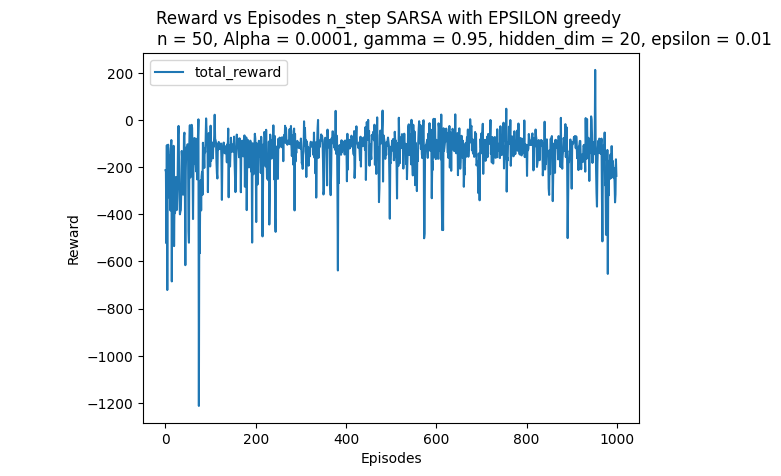

20 0.0001 0.95 0.01 100
Linear(in_features=8, out_features=20, bias=True)
Linear(in_features=20, out_features=4, bias=True)
i_epi = 0, G = -437.89399219608606
i_epi = 100, G = -52.739529670373244
i_epi = 200, G = -19.815209520993818
i_epi = 300, G = -47.933227982227265
i_epi = 400, G = -135.26314508454396
i_epi = 500, G = -120.57869375250618
i_epi = 600, G = -168.14890182256164
i_epi = 700, G = -101.42706742525831
i_epi = 800, G = -151.73333853534518
i_epi = 900, G = -86.38816186394924


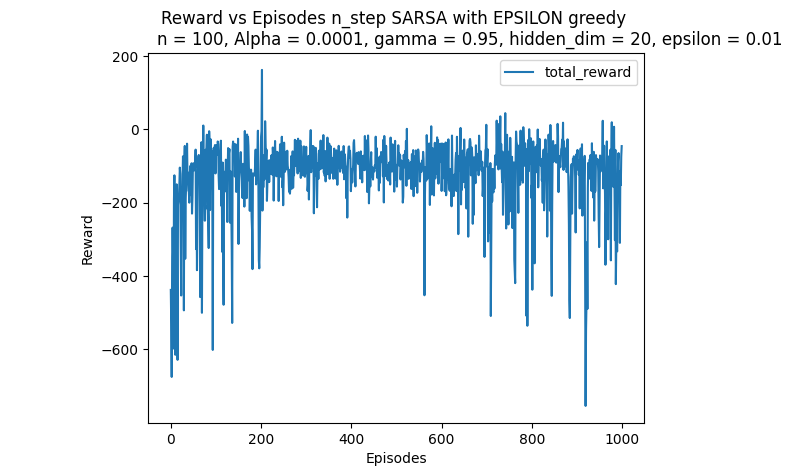

In [48]:
l_hidden_dim = [20]
    # l_alpha = [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1]
l_alpha = [0.0001]
# l_gamma = [0.5, 0.8, 0.9, 0.95, 0.93, 0.99, 1]
l_gamma = [0.95]
# l_epsilon = [0, 0.01, 0.1, 0.2, 0.5]
l_epsilon = [0.01]
# l_n = [2, 5, 10, 20, 50, 75, 100]
l_n = [5, 10, 20, 50, 100]
n_episodes = 1000
runs_dict_list =[]

for hidden_dim in l_hidden_dim:
    for alpha in l_alpha:
        for gamma in l_gamma:
            for epsilon in l_epsilon:
                for n in l_n:
                    print(hidden_dim, alpha, gamma, epsilon, n)
                    env = gym.make("LunarLander-v2", render_mode='rgb_array')
                    agent_sarsa = agents.AgentSARSA(
                                                state_dim=env.observation_space.shape[0],
                                                action_dim=env.action_space.n,
                                                hidden_dim=hidden_dim,
                                                alpha=alpha,
                                                gamma=gamma, 
                                                epsilon=epsilon, 
                                                n=n)
                    
                    runs = []
                    i_epi = 0
                    while(i_epi < n_episodes):
                        G = NSteprunEpisodeSarsa(env, agent=agent_sarsa, n=n, gamma=gamma)
                        if(i_epi%100 ==0):
                            print(f"i_epi = {i_epi}, G = {G}")
                        runs.append(G)
                        i_epi+=1

                    runs_df = pd.DataFrame(runs, columns=['total_reward'])

                    run_stat = {
                    "hidden_dim": hidden_dim,
                    "n": n,
                    "alpha": alpha,
                    "gamma": gamma,
                    "epsilon": epsilon,
                    "n": n,
                    "n_episodes": n_episodes,
                    "runs_df": runs_df
                    }
                    runs_dict_list.append(run_stat)
                    
                    sns.lineplot(runs_df, err_style="band", errorbar=("sd", 1))
                    plt.ylabel(f"Reward")
                    plt.xlabel(f"Episodes")
                    
                    title = f"Reward vs Episodes n_step SARSA with EPSILON greedy \n\
                            n = {n}, Alpha = {alpha}, gamma = {gamma}, hidden_dim = {hidden_dim}, epsilon = {epsilon}"
                    plt.title(title)
                    plt.savefig(f"plots/N COMPARISON n_step SARSA with EPSILON greedy episodes:{n_episodes} n:{n} Alpha:{alpha} gamma:{gamma} hidden_dim:{hidden_dim} epsilon:{epsilon}.jpg", bbox_inches='tight')
                    plt.show()

    


In [5]:
# runs_dict_list_hist = runs_dict_list

In [51]:
from matplotlib.pyplot import figure

df1 = runs_df
for run_dict in runs_dict_list:
    runs_df = run_dict['runs_df']
    n_episodes = run_dict['n_episodes']
    n = run_dict['n']
    alpha = run_dict['alpha']
    hidden_dim = run_dict['hidden_dim']
    epsilon = run_dict['epsilon']

    


In [52]:
df1

,total_reward
0,-437.893992
1,-531.230114
2,-675.003612
3,-347.076082
4,-268.077547
...,...
995,-309.675408
996,-114.567126
997,-152.343025
998,-74.885420
